In [22]:
#load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans

In [23]:
data=pd.read_csv('Marketing_Campaign_Dataset.csv')
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1,1978,Master,Single,491796.22,1,0,2013-12-26,31,1364,...,14,1,1,0,0,0,0,3,11,1
1,2,1974,Master,Married,513926.78,1,0,2014-05-04,23,1275,...,5,1,1,0,0,0,0,3,11,1
2,3,1972,Graduation,Alone,521309.22,2,2,2013-02-15,93,62,...,1,1,0,0,0,1,0,3,11,1
3,4,1911,PhD,YOLO,231628.91,1,0,2013-06-12,13,251,...,14,0,1,1,0,1,0,3,11,0
4,5,1931,2n Cycle,Divorced,223936.10,1,1,2013-05-30,65,670,...,13,1,0,0,1,1,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100274,100275,1977,PhD,Absurd,135662.71,2,1,2012-12-10,89,48,...,4,0,0,1,1,0,1,3,11,1
100275,100276,1903,Graduation,Divorced,622939.79,2,2,2014-05-16,36,8,...,14,0,1,0,1,0,1,3,11,1
100276,100277,1929,Graduation,Divorced,410351.37,2,2,2012-10-11,90,813,...,3,1,0,0,1,0,1,3,11,1
100277,100278,1986,Basic,YOLO,64094.50,2,2,2014-07-01,84,535,...,10,1,1,0,1,0,1,3,11,1


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100279 entries, 0 to 100278
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   100279 non-null  int64  
 1   Year_Birth           100279 non-null  int64  
 2   Education            100279 non-null  object 
 3   Marital_Status       100279 non-null  object 
 4   Income               100279 non-null  float64
 5   Kidhome              100279 non-null  int64  
 6   Teenhome             100279 non-null  int64  
 7   Dt_Customer          100279 non-null  object 
 8   Recency              100279 non-null  int64  
 9   MntWines             100279 non-null  int64  
 10  MntFruits            100279 non-null  int64  
 11  MntMeatProducts      100279 non-null  int64  
 12  MntFishProducts      100279 non-null  int64  
 13  MntSweetProducts     100279 non-null  int64  
 14  MntGoldProds         100279 non-null  int64  
 15  NumDealsPurchases

In [25]:
data.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [26]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,100279.000000,100279.000000,100279.000000,100279.000000,100279.000000,100279.000000,100279.000000,100279.000000,100279.000000,100279.000000,...,100279.000000,100279.000000,100279.000000,100279.000000,100279.000000,100279.000000,100279.000000,100279.0,100279.0,100279.000000
mean,50140.000000,1944.139720,333467.834329,1.001845,0.999741,49.002802,746.463477,99.083387,862.007549,129.312987,...,9.499078,0.502139,0.500514,0.500873,0.497951,0.501890,0.499576,3.0,11.0,0.498988
std,28948.198159,29.713721,191857.770691,0.817953,0.816680,28.531490,431.644442,57.403252,498.945468,74.862017,...,5.771568,0.499998,0.500002,0.500002,0.499998,0.499999,0.500002,0.0,0.0,0.500001
min,1.000000,1893.000000,1735.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,25070.500000,1918.000000,167676.135000,0.000000,0.000000,24.000000,372.000000,50.000000,431.000000,65.000000,...,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,50140.000000,1944.000000,332609.990000,1.000000,1.000000,49.000000,746.000000,99.000000,862.000000,130.000000,...,9.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.0,11.0,0.000000
75%,75209.500000,1970.000000,498824.360000,2.000000,2.000000,74.000000,1119.000000,149.000000,1297.000000,194.000000,...,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
max,100279.000000,1995.000000,666664.130000,2.000000,2.000000,98.000000,1492.000000,198.000000,1724.000000,258.000000,...,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [27]:
data1 = data.iloc[:, 1:]

In [28]:
data1

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1978,Master,Single,491796.22,1,0,2013-12-26,31,1364,72,...,14,1,1,0,0,0,0,3,11,1
1,1974,Master,Married,513926.78,1,0,2014-05-04,23,1275,94,...,5,1,1,0,0,0,0,3,11,1
2,1972,Graduation,Alone,521309.22,2,2,2013-02-15,93,62,127,...,1,1,0,0,0,1,0,3,11,1
3,1911,PhD,YOLO,231628.91,1,0,2013-06-12,13,251,87,...,14,0,1,1,0,1,0,3,11,0
4,1931,2n Cycle,Divorced,223936.10,1,1,2013-05-30,65,670,10,...,13,1,0,0,1,1,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100274,1977,PhD,Absurd,135662.71,2,1,2012-12-10,89,48,87,...,4,0,0,1,1,0,1,3,11,1
100275,1903,Graduation,Divorced,622939.79,2,2,2014-05-16,36,8,92,...,14,0,1,0,1,0,1,3,11,1
100276,1929,Graduation,Divorced,410351.37,2,2,2012-10-11,90,813,91,...,3,1,0,0,1,0,1,3,11,1
100277,1986,Basic,YOLO,64094.50,2,2,2014-07-01,84,535,1,...,10,1,1,0,1,0,1,3,11,1


In [29]:
cols=data1.columns

In [30]:
numeric_cols = data1.select_dtypes(include=['number']).columns
data_numeric = data1[numeric_cols]

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_numeric)
scaled_data_df = pd.DataFrame(scaled_data, columns=numeric_cols)
print(scaled_data_df.head())  

   Year_Birth    Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0    1.139556  0.825242 -0.002255 -1.224159 -0.630983  1.430667  -0.471812   
1    1.004937  0.940592 -0.002255 -1.224159 -0.911377  1.224478  -0.088556   
2    0.937628  0.979071  1.220315  1.224794  1.542065 -1.585719   0.486327   
3   -1.115306 -0.530807 -0.002255 -1.224159 -1.261868 -1.147857  -0.210501   
4   -0.442213 -0.570904 -0.002255  0.000317  0.560688 -0.177145  -1.551895   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  NumWebVisitsMonth  \
0         0.535116        -1.126251         -0.816249  ...           0.779848   
1        -0.815740         1.171321         -0.355661  ...          -0.779528   
2        -0.665422         1.638850          1.394573  ...          -1.472584   
3         0.583218         0.369842          1.447211  ...           0.779848   
4        -0.424913        -1.273189         -0.460939  ...           0.606584   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5 

In [35]:
# Bulid 3 Clusters using KMeans cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=0)
clusters_new.fit(scaled_data_df)

KMeans(n_clusters=3, random_state=0)

In [36]:
# Print the cluster labels
clusters_new.labels_

array([0, 0, 2, ..., 2, 0, 1])

In [37]:
set(clusters_new.labels_)

{0, 1, 2}

In [39]:
#Assign clusters to the Univ data set
data['clusterid_new']=clusters_new.labels_

In [40]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,clusterid_new
0,1,1978,Master,Single,491796.22,1,0,2013-12-26,31,1364,...,1,1,0,0,0,0,3,11,1,0
1,2,1974,Master,Married,513926.78,1,0,2014-05-04,23,1275,...,1,1,0,0,0,0,3,11,1,0
2,3,1972,Graduation,Alone,521309.22,2,2,2013-02-15,93,62,...,1,0,0,0,1,0,3,11,1,2
3,4,1911,PhD,YOLO,231628.91,1,0,2013-06-12,13,251,...,0,1,1,0,1,0,3,11,0,1
4,5,1931,2n Cycle,Divorced,223936.10,1,1,2013-05-30,65,670,...,1,0,0,1,1,0,3,11,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100274,100275,1977,PhD,Absurd,135662.71,2,1,2012-12-10,89,48,...,0,0,1,1,0,1,3,11,1,2
100275,100276,1903,Graduation,Divorced,622939.79,2,2,2014-05-16,36,8,...,0,1,0,1,0,1,3,11,1,1
100276,100277,1929,Graduation,Divorced,410351.37,2,2,2012-10-11,90,813,...,1,0,0,1,0,1,3,11,1,2
100277,100278,1986,Basic,YOLO,64094.50,2,2,2014-07-01,84,535,...,1,1,0,1,0,1,3,11,1,0


In [42]:
data[data['clusterid_new']==1]
data.head(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,clusterid_new
0,1,1978,Master,Single,491796.22,1,0,2013-12-26,31,1364,...,1,1,0,0,0,0,3,11,1,0
1,2,1974,Master,Married,513926.78,1,0,2014-05-04,23,1275,...,1,1,0,0,0,0,3,11,1,0
2,3,1972,Graduation,Alone,521309.22,2,2,2013-02-15,93,62,...,1,0,0,0,1,0,3,11,1,2
3,4,1911,PhD,YOLO,231628.91,1,0,2013-06-12,13,251,...,0,1,1,0,1,0,3,11,0,1
4,5,1931,2n Cycle,Divorced,223936.10,1,1,2013-05-30,65,670,...,1,0,0,1,1,0,3,11,0,2
5,6,1929,2n Cycle,Alone,548686.70,0,2,2014-01-31,9,110,...,1,0,1,0,0,0,3,11,1,2
6,7,1922,Master,Single,48266.86,2,1,2013-02-13,1,794,...,1,0,0,0,1,1,3,11,1,2
7,8,1905,Basic,Alone,491725.72,0,0,2013-09-12,25,91,...,1,0,1,0,0,0,3,11,1,2
8,9,1990,PhD,Single,527818.67,2,0,2013-08-28,96,946,...,0,1,1,0,0,1,3,11,1,1
9,10,1931,Master,Married,661400.24,0,0,2013-03-16,75,399,...,1,0,1,1,0,1,3,11,1,2


In [43]:
data[data['clusterid_new']==0]
data.head(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,clusterid_new
0,1,1978,Master,Single,491796.22,1,0,2013-12-26,31,1364,...,1,1,0,0,0,0,3,11,1,0
1,2,1974,Master,Married,513926.78,1,0,2014-05-04,23,1275,...,1,1,0,0,0,0,3,11,1,0
2,3,1972,Graduation,Alone,521309.22,2,2,2013-02-15,93,62,...,1,0,0,0,1,0,3,11,1,2
3,4,1911,PhD,YOLO,231628.91,1,0,2013-06-12,13,251,...,0,1,1,0,1,0,3,11,0,1
4,5,1931,2n Cycle,Divorced,223936.10,1,1,2013-05-30,65,670,...,1,0,0,1,1,0,3,11,0,2
5,6,1929,2n Cycle,Alone,548686.70,0,2,2014-01-31,9,110,...,1,0,1,0,0,0,3,11,1,2
6,7,1922,Master,Single,48266.86,2,1,2013-02-13,1,794,...,1,0,0,0,1,1,3,11,1,2
7,8,1905,Basic,Alone,491725.72,0,0,2013-09-12,25,91,...,1,0,1,0,0,0,3,11,1,2
8,9,1990,PhD,Single,527818.67,2,0,2013-08-28,96,946,...,0,1,1,0,0,1,3,11,1,1
9,10,1931,Master,Married,661400.24,0,0,2013-03-16,75,399,...,1,0,1,1,0,1,3,11,1,2


In [44]:
data[data['clusterid_new']==2]
data.head(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,clusterid_new
0,1,1978,Master,Single,491796.22,1,0,2013-12-26,31,1364,...,1,1,0,0,0,0,3,11,1,0
1,2,1974,Master,Married,513926.78,1,0,2014-05-04,23,1275,...,1,1,0,0,0,0,3,11,1,0
2,3,1972,Graduation,Alone,521309.22,2,2,2013-02-15,93,62,...,1,0,0,0,1,0,3,11,1,2
3,4,1911,PhD,YOLO,231628.91,1,0,2013-06-12,13,251,...,0,1,1,0,1,0,3,11,0,1
4,5,1931,2n Cycle,Divorced,223936.10,1,1,2013-05-30,65,670,...,1,0,0,1,1,0,3,11,0,2
5,6,1929,2n Cycle,Alone,548686.70,0,2,2014-01-31,9,110,...,1,0,1,0,0,0,3,11,1,2
6,7,1922,Master,Single,48266.86,2,1,2013-02-13,1,794,...,1,0,0,0,1,1,3,11,1,2
7,8,1905,Basic,Alone,491725.72,0,0,2013-09-12,25,91,...,1,0,1,0,0,0,3,11,1,2
8,9,1990,PhD,Single,527818.67,2,0,2013-08-28,96,946,...,0,1,1,0,0,1,3,11,1,1
9,10,1931,Master,Married,661400.24,0,0,2013-03-16,75,399,...,1,0,1,1,0,1,3,11,1,2


In [45]:
data
data.head(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,clusterid_new
0,1,1978,Master,Single,491796.22,1,0,2013-12-26,31,1364,...,1,1,0,0,0,0,3,11,1,0
1,2,1974,Master,Married,513926.78,1,0,2014-05-04,23,1275,...,1,1,0,0,0,0,3,11,1,0
2,3,1972,Graduation,Alone,521309.22,2,2,2013-02-15,93,62,...,1,0,0,0,1,0,3,11,1,2
3,4,1911,PhD,YOLO,231628.91,1,0,2013-06-12,13,251,...,0,1,1,0,1,0,3,11,0,1
4,5,1931,2n Cycle,Divorced,223936.10,1,1,2013-05-30,65,670,...,1,0,0,1,1,0,3,11,0,2
5,6,1929,2n Cycle,Alone,548686.70,0,2,2014-01-31,9,110,...,1,0,1,0,0,0,3,11,1,2
6,7,1922,Master,Single,48266.86,2,1,2013-02-13,1,794,...,1,0,0,0,1,1,3,11,1,2
7,8,1905,Basic,Alone,491725.72,0,0,2013-09-12,25,91,...,1,0,1,0,0,0,3,11,1,2
8,9,1990,PhD,Single,527818.67,2,0,2013-08-28,96,946,...,0,1,1,0,0,1,3,11,1,1
9,10,1931,Master,Married,661400.24,0,0,2013-03-16,75,399,...,1,0,1,1,0,1,3,11,1,2


In [49]:
#Use groupby() to find aggregated (mean) values in eavh cluster
data.groupby('clusterid_new').mean(numeric_only=True)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
clusterid_new,,,,,,,,,,,,,,,,,,,,,
0,50251.511451,1944.197534,334651.440739,0.999761,1.000678,48.958825,746.390201,99.345635,862.943146,129.424872,...,9.554141,1.000000,1.0,0.501117,0.501596,0.502753,0.498404,3.0,11.0,0.498883
1,50517.718908,1944.051538,332512.124508,1.009193,1.003502,48.906037,746.061328,99.149600,859.540216,129.281928,...,9.469455,0.000000,1.0,0.503403,0.497751,0.498906,0.500139,3.0,11.0,0.501731
2,49894.714383,1944.155027,333354.997114,0.999201,0.997385,49.073351,746.701885,98.918943,862.777132,129.272580,...,9.486384,0.504911,0.0,0.499481,0.496227,0.502955,0.499880,3.0,11.0,0.497664


[2306416.9999999995, 2231138.4117128514, 2155922.13426882, 2118153.8415025524, 2080759.0681294804, 2055926.5523207227, 2030493.498149477, 2016376.2069715313, 1994940.004067972, 1989403.920508625, 1969884.894744352, 1955417.3743446653, 1946235.680098087, 1930049.6527151186, 1925739.4632925678, 1914414.4196946379, 1905513.18048133, 1897528.0012240193, 1898384.696215195]


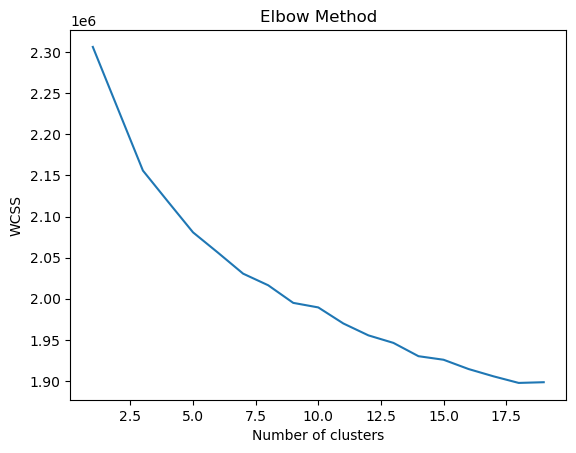

In [51]:
wcss=[]
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_data_df)
    wcss.append(kmeans.inertia_)
print(wcss)
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [53]:
from sklearn.metrics import silhouette_score
score = silhouette_score(scaled_data_df, clusters_new.labels_, metric='euclidean')
score

0.03449520031479717